In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scs
import joblib
import yaml
import matplotlib.pyplot as plt

## 1. Import Params

In [5]:
params_dir = "config/params.yaml"

In [6]:
def load_params(param_dir):
    with open(param_dir, 'r') as file:
        params = yaml.safe_load(file)
        
    return params

In [7]:
params = load_params(params_dir)

In [8]:
params

{'dataset_dir': '../data/raw/',
 'datetime_columns': ['tanggal'],
 'object_columns': ['stasiun', 'critical', 'categori'],
 'int32_columns': ['pm10', 'pm25', 'so2', 'co', 'o3', 'no2', 'max'],
 'predictors': ['stasiun', 'pm10', 'pm25', 'so2', 'co', 'o3', 'no2'],
 'range_stasiun': ['DKI1 (Bunderan HI)',
  'DKI2 (Kelapa Gading)',
  'DKI3 (Jagakarsa)',
  'DKI4 (Lubang Buaya)',
  'DKI5 (Kebon Jeruk) Jakarta Barat'],
 'range_pm10': [-1, 800],
 'range_pm25': [-1, 400],
 'range_so2': [-1, 500],
 'range_co': [-1, 100],
 'range_o3': [-1, 160],
 'range_no2': [-1, 100]}

## 2. Load Train Set

In [9]:
x_train = joblib.load("data/processed/x_train.pkl")
y_train = joblib.load("data/processed/y_train.pkl")

In [10]:
x_train

,stasiun,pm10,pm25,so2,co,o3,no2
1527,DKI1 (Bunderan HI),25,42,20,8,18,22
433,DKI5 (Kebon Jeruk) Jakarta Barat,57,86,-1,16,19,30
1357,DKI5 (Kebon Jeruk) Jakarta Barat,24,35,21,7,22,9
1136,DKI2 (Kelapa Gading),38,55,24,11,68,7
1097,DKI1 (Bunderan HI),72,108,14,43,44,20
...,...,...,...,...,...,...,...
1802,DKI5 (Kebon Jeruk) Jakarta Barat,46,74,33,7,26,18
1433,DKI3 (Jagakarsa),35,55,42,7,29,9
977,DKI2 (Kelapa Gading),82,112,56,12,41,27
983,DKI3 (Jagakarsa),60,84,47,7,23,18


In [11]:
y_train

1527           BAIK
433          SEDANG
1357           BAIK
1136         SEDANG
1097    TIDAK SEHAT
           ...     
1802         SEDANG
1433         SEDANG
977     TIDAK SEHAT
983          SEDANG
747          SEDANG
Name: categori, Length: 1269, dtype: object

In [12]:
dataset = pd.concat([x_train, y_train], axis = 1)

In [13]:
dataset

,stasiun,pm10,pm25,so2,co,o3,no2,categori
1527,DKI1 (Bunderan HI),25,42,20,8,18,22,BAIK
433,DKI5 (Kebon Jeruk) Jakarta Barat,57,86,-1,16,19,30,SEDANG
1357,DKI5 (Kebon Jeruk) Jakarta Barat,24,35,21,7,22,9,BAIK
1136,DKI2 (Kelapa Gading),38,55,24,11,68,7,SEDANG
1097,DKI1 (Bunderan HI),72,108,14,43,44,20,TIDAK SEHAT
...,...,...,...,...,...,...,...,...
1802,DKI5 (Kebon Jeruk) Jakarta Barat,46,74,33,7,26,18,SEDANG
1433,DKI3 (Jagakarsa),35,55,42,7,29,9,SEDANG
977,DKI2 (Kelapa Gading),82,112,56,12,41,27,TIDAK SEHAT
983,DKI3 (Jagakarsa),60,84,47,7,23,18,SEDANG


## 3. EDA

### 3.1. Cek Missing Value

In [14]:
# ubah kembali nilai yang awalnya adalah -1 menjadi NaN
dataset.replace(-1, np.nan, inplace = True)

In [15]:
# cek null value
dataset.isnull().sum()

stasiun      0
pm10        35
pm25        55
so2         68
co          10
o3          35
no2          9
categori     0
dtype: int64

### 3.2. Cek Informasi Statistik

#### 3.2.1. Cek Skewness

In [12]:
# cek skewness
dataset.skew(numeric_only = True)

pm10   -0.196274
pm25    0.315916
so2     0.137343
co      1.720796
o3      1.688855
no2     0.804295
dtype: float64

In [13]:
# kolom co, o3 dan no2 > +- 0.5, maka dari itu kolom tersebut akan diimputasi dengan median
# kolom lainnya akan diimputasi dengan mean

#### 3.2.2. Pemisahan Dataset berdasarkan Kelas

In [15]:
# pisahkan menjadi 2 kelas untuk melihat apakah kita perlu melakukan imputasi berdasarkan kelas
dataset_baik = dataset[dataset.categori == "BAIK"].copy()
dataset_tidak_baik = dataset[dataset.categori != "BAIK"].copy()

In [16]:
# kelas 1
dataset_baik.describe()

,pm10,pm25,so2,co,o3,no2
count,127.000000,97.000000,129.00000,132.000000,129.000000,126.000000
mean,28.259843,38.298969,25.27907,8.621212,26.147287,10.936508
std,7.966410,8.305577,11.15584,4.559246,11.102576,6.954418
min,14.000000,13.000000,3.00000,2.000000,7.000000,3.000000
25%,23.000000,33.000000,17.00000,6.000000,16.000000,6.000000
50%,27.000000,39.000000,23.00000,8.000000,24.000000,9.000000
75%,32.000000,45.000000,36.00000,11.000000,35.000000,13.000000
max,50.000000,50.000000,49.00000,28.000000,49.000000,49.000000


In [17]:
# kelas 0
dataset_tidak_baik.describe()

,pm10,pm25,so2,co,o3,no2
count,1107.000000,1117.000000,1072.000000,1127.000000,1105.000000,1134.000000
mean,55.427281,82.760072,36.512127,11.989352,32.390950,20.354497
std,13.009139,22.550256,12.188599,4.862941,14.769274,8.824437
min,19.000000,21.000000,5.000000,3.000000,9.000000,1.000000
25%,48.000000,67.000000,27.000000,9.000000,23.000000,14.000000
50%,56.000000,81.000000,37.000000,11.000000,29.000000,19.000000
75%,63.500000,96.000000,45.000000,14.000000,38.000000,26.000000
max,100.000000,174.000000,82.000000,44.000000,151.000000,65.000000


In [ ]:
# pm10      : mean dari kelas 0 dan 1 terpaut cukup jauh, maka akan menggunakan kelas
# pm25      : mean dari kelas 0 dan 1 terpaut cukup jauh, maka akan menggunakan kelas
# so2       : mean dari kelas 0 dan 1 tidak terpaut jauh, maka tidak akan menggunakan kelas
# co        : median dari kelas 0 dan 1 tidak terpaut jauh, maka tidak akan menggunakan kelas
# o3        : median dari kelas 0 dan 1 tidak terpaut jauh, maka tidak akan menggunakan kelas
# no2       : median dari kelas 0 dan 1 tidak terpaut jauh, maka tidak akan menggunakan kelas

#### 3.2.3. Visualisasi untuk fitur PM10

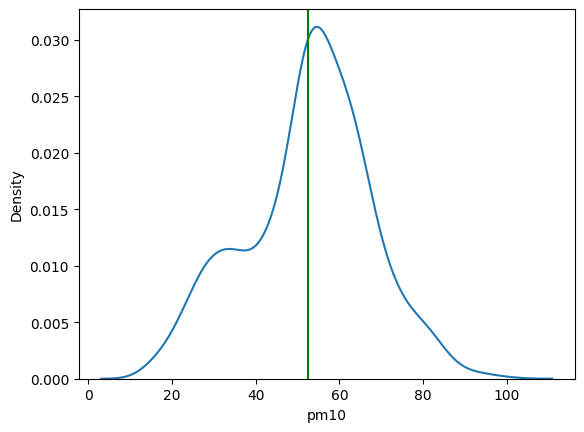

In [46]:
# plot untuk melihat distribusi pm10 jika tidak dibedakan berdasarkan categori
sns.kdeplot(data = dataset.replace("SEDANG", "TIDAK SEHAT"), x = "pm10")
plt.axvline(dataset.pm10.mean(), 0, 1, color = "g")

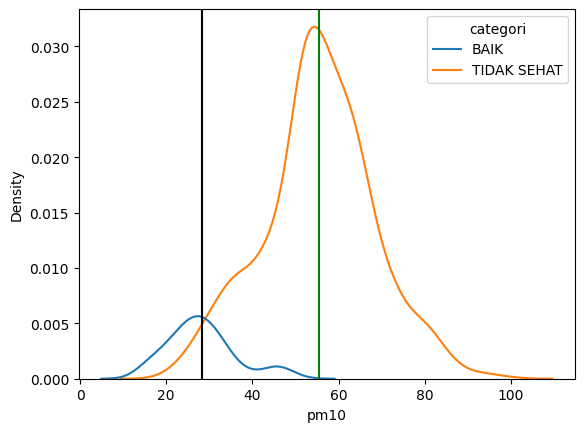

In [43]:
# plot untuk melihat distribusi pm10 jika dibedakan berdasarkan categori
sns.kdeplot(data = dataset.replace("SEDANG", "TIDAK SEHAT"), x = "pm10", hue = "categori")
plt.axvline(dataset_tidak_baik.pm10.mean(), 0, 1, color = "g")
plt.axvline(dataset_baik.pm10.mean(), 0, 1, color = "k")

In [ ]:
# distribusi sedikit skew ke kiri (nilai skew fisher-pearson negatif) namun tidak signifikan, imputasi mean
# mean 2 kelas berbeda jauh, imputasi berdasarkan kelas
# kesimpulan: untuk pm10 akan menggunakan mean dari perkelas untuk imputasi

#### 3.2.4. Visualisasi untuk fitur PM25

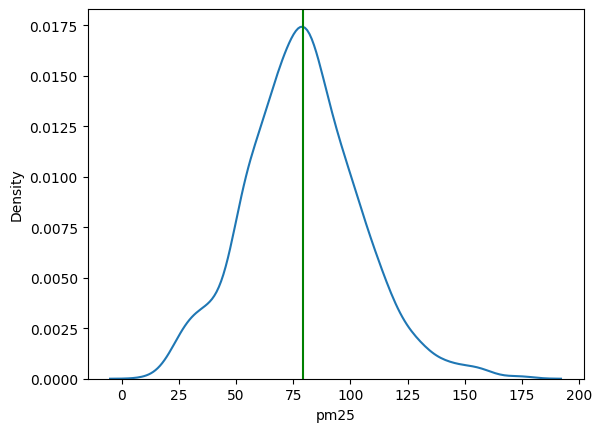

In [48]:
sns.kdeplot(data = dataset.replace("SEDANG", "TIDAK SEHAT"), x = "pm25")
plt.axvline(dataset.pm25.mean(), 0, 1, color = "g")

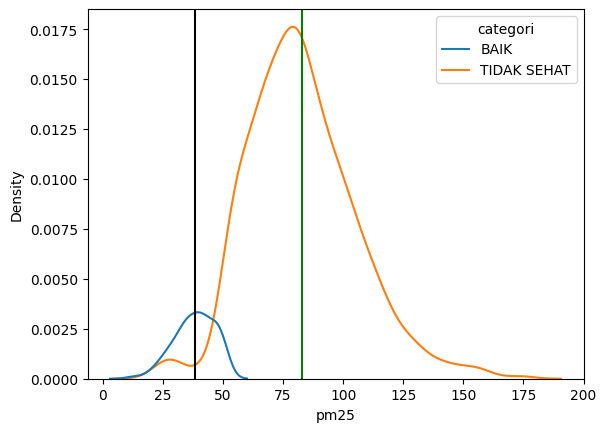

In [49]:
sns.kdeplot(data = dataset.replace("SEDANG", "TIDAK SEHAT"), x = "pm25", hue = "categori")
plt.axvline(dataset_tidak_baik.pm25.mean(), 0, 1, color = "g")
plt.axvline(dataset_baik.pm25.mean(), 0, 1, color = "k")

In [ ]:
# distribusi sangat dekat dengan normal (nilai skew fisher-pearson mendekati nol), imputasi mean
# mean 2 kelas berbeda jauh, imputasi berdasarkan kelas
# kesimpulan: untuk pm25 akan menggunakan mean dari perkelas untuk imputasi

#### 3.2.5. Visualisasi untuk fitur SO2

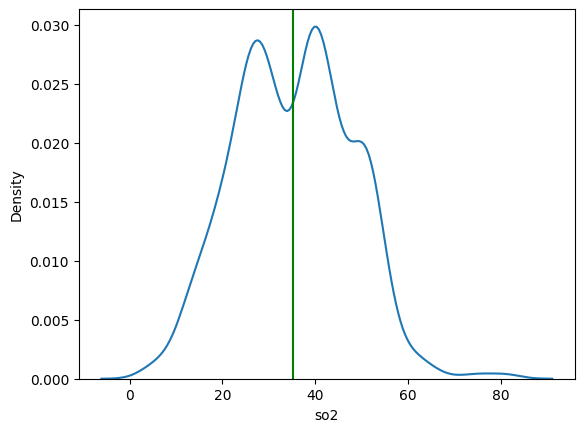

In [51]:
sns.kdeplot(data = dataset.replace("SEDANG", "TIDAK SEHAT"), x = "so2")
plt.axvline(dataset.so2.mean(), 0, 1, color = "g")

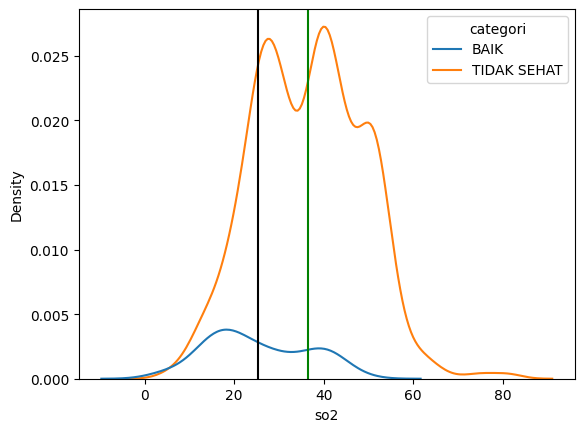

In [52]:
sns.kdeplot(data = dataset.replace("SEDANG", "TIDAK SEHAT"), x = "so2", hue = "categori")
plt.axvline(dataset_tidak_baik.so2.mean(), 0, 1, color = "g")
plt.axvline(dataset_baik.so2.mean(), 0, 1, color = "k")

#### 3.2.6. Visualisasi untuk fitur CO

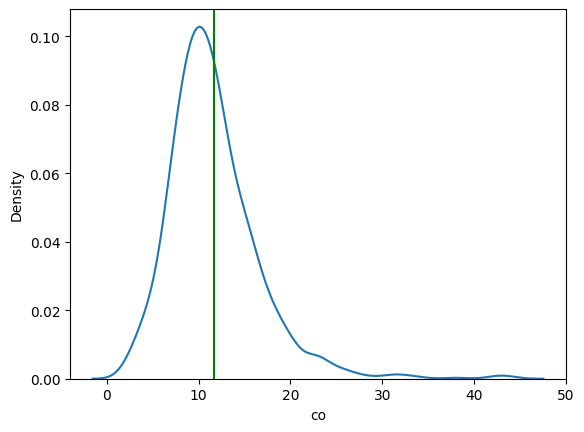

In [54]:
sns.kdeplot(data = dataset.replace("SEDANG", "TIDAK SEHAT"), x = "co")
plt.axvline(dataset.co.mean(), 0, 1, color = "g")

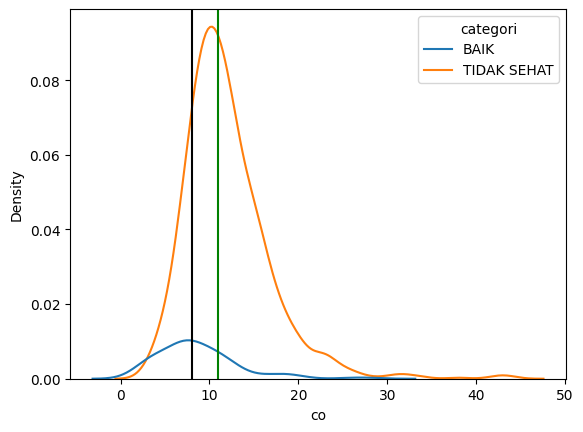

In [56]:
sns.kdeplot(data = dataset.replace("SEDANG", "TIDAK SEHAT"), x = "co", hue = "categori")
plt.axvline(dataset_tidak_baik.co.median(), 0, 1, color = "g")
plt.axvline(dataset_baik.co.median(), 0, 1, color = "k")

#### 3.2.7. Visualisasi untuk fitur O3

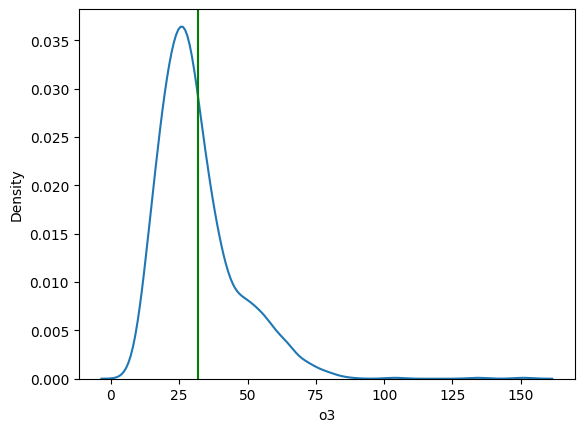

In [58]:
sns.kdeplot(data = dataset.replace("SEDANG", "TIDAK SEHAT"), x = "o3")
plt.axvline(dataset.o3.mean(), 0, 1, color = "g")

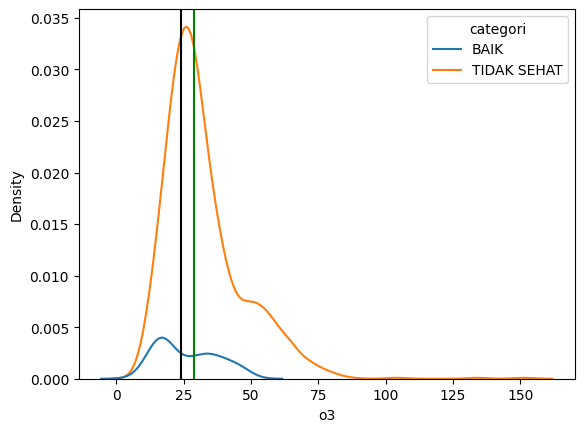

In [59]:
sns.kdeplot(data = dataset.replace("SEDANG", "TIDAK SEHAT"), x = "o3", hue = "categori")
plt.axvline(dataset_tidak_baik.o3.median(), 0, 1, color = "g")
plt.axvline(dataset_baik.o3.median(), 0, 1, color = "k")

#### 3.2.8. Visualisasi untuk fitur NO2

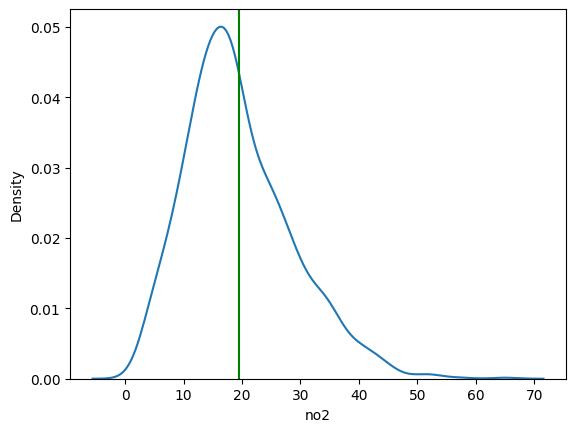

In [62]:
sns.kdeplot(data = dataset.replace("SEDANG", "TIDAK SEHAT"), x = "no2")
plt.axvline(dataset.no2.mean(), 0, 1, color = "g")

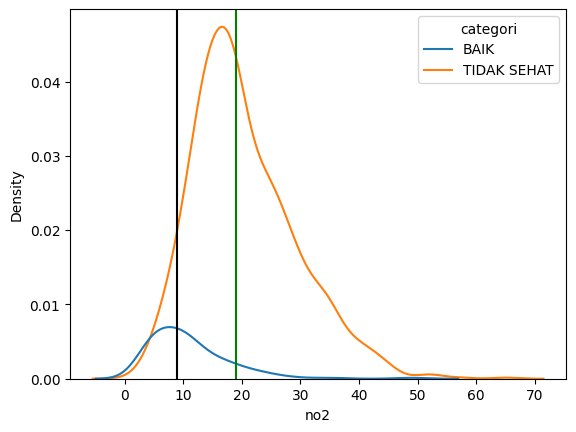

In [63]:
sns.kdeplot(data = dataset.replace("SEDANG", "TIDAK SEHAT"), x = "no2", hue = "categori")
plt.axvline(dataset_tidak_baik.no2.median(), 0, 1, color = "g")
plt.axvline(dataset_baik.no2.median(), 0, 1, color = "k")

#### 3.2.9. Pearson Corrlation

<AxesSubplot: >

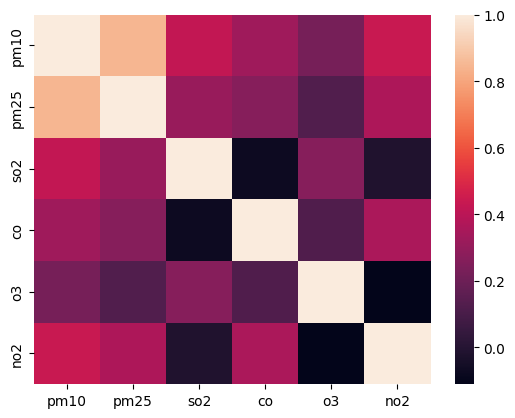

In [66]:
sns.heatmap(dataset.corr(numeric_only = True))

#### 3.2.10. T Test untuk PM10

In [ ]:
# h0    = mean pm10 untuk kelas 0 = mean pm10 untuk kelas 1
# h1    = mean pm10 untuk kelas 0 != mean pm10 untuk kelas 1

In [86]:
# perform t-test untuk 2 variabel
scs.ttest_ind(
    dataset_baik[dataset_baik.pm10.isnull() != True].pm10,
    dataset_tidak_baik[dataset_tidak_baik.pm10.isnull() != True].pm10
)

Ttest_indResult(statistic=-23.03890903177555, pvalue=5.926662098072182e-98)

In [77]:
# nilai t critical untuk alpha 0.05
scs.t.ppf(0.05, df = (len(dataset) - 2))

-1.64605717129089

In [87]:
# dengan nilai t-value < t-critical dan nilai p-value < 0.05 maka h0 di reject
# mean antara kelas 0 dan kelas 1 untuk pm10 statistically significant

#### 3.2.11. T Test untuk PM25

In [88]:
# h0    = mean pm25 untuk kelas 0 = mean pm25 untuk kelas 1
# h1    = mean pm25 untuk kelas 0 != mean pm25 untuk kelas 1

In [91]:
# perform t-test untuk 2 variabel
scs.ttest_ind(
    dataset_baik[dataset_baik.pm25.isnull() != True].pm25,
    dataset_tidak_baik[dataset_tidak_baik.pm25.isnull() != True].pm25
)

Ttest_indResult(statistic=-19.298865811060065, pvalue=1.413091762591775e-72)

In [92]:
# nilai t critical untuk alpha 0.05
scs.t.ppf(0.05, df = (len(dataset) - 2))

-1.64605717129089

In [93]:
# dengan nilai t-value < t-critical dan nilai p-value < 0.05 maka h0 di reject
# mean antara kelas 0 dan kelas 1 untuk pm25 statistically significant

#### 3.2.12 T Test untuk SO2

In [94]:
# h0    = mean so2 untuk kelas 0 = mean so2 untuk kelas 1
# h1    = mean so2 untuk kelas 0 != mean so2 untuk kelas 1

In [95]:
# perform t-test untuk 2 variabel
scs.ttest_ind(
    dataset_baik[dataset_baik.so2.isnull() != True].so2,
    dataset_tidak_baik[dataset_tidak_baik.so2.isnull() != True].so2
)

Ttest_indResult(statistic=-9.97607953790784, pvalue=1.4294113813260584e-22)

In [96]:
# nilai t critical untuk alpha 0.05
scs.t.ppf(0.05, df = (len(dataset) - 2))

-1.64605717129089

In [97]:
# dengan nilai t-value < t-critical dan nilai p-value < 0.05 maka h0 di reject
# mean antara kelas 0 dan kelas 1 untuk so2 statistically significant

#### 3.2.13 T Test untuk CO

In [98]:
# h0    = mean co untuk kelas 0 = mean co untuk kelas 1
# h1    = mean co untuk kelas 0 != mean co untuk kelas 1

In [99]:
# perform t-test untuk 2 variabel
scs.ttest_ind(
    dataset_baik[dataset_baik.co.isnull() != True].co,
    dataset_tidak_baik[dataset_tidak_baik.co.isnull() != True].co
)

Ttest_indResult(statistic=-7.5767489321394645, pvalue=6.843760773275538e-14)

In [100]:
# nilai t critical untuk alpha 0.05
scs.t.ppf(0.05, df = (len(dataset) - 2))

-1.64605717129089

In [101]:
# dengan nilai t-value < t-critical dan nilai p-value < 0.05 maka h0 di reject
# mean antara kelas 0 dan kelas 1 untuk co statistically significant

#### 3.2.14 T Test untuk O3

In [102]:
# h0    = mean o3 untuk kelas 0 = mean o3 untuk kelas 1
# h1    = mean o3 untuk kelas 0 != mean o3 untuk kelas 1

In [112]:
# perform t-test untuk 2 variabel
scs.ttest_ind(
    dataset_baik[dataset_baik.o3.isnull() != True].o3,
    dataset_tidak_baik[dataset_tidak_baik.o3.isnull() != True].o3,
    equal_var = False
)

Ttest_indResult(statistic=-5.8147582595935665, pvalue=2.6119427965574716e-08)

In [111]:
# nilai t critical untuk alpha 0.05
scs.t.ppf(0.05, df = (len(dataset) - 2))

-1.64605717129089

In [105]:
# dengan nilai t-value < t-critical dan nilai p-value < 0.05 maka h0 di reject
# mean antara kelas 0 dan kelas 1 untuk o3 statistically significant

#### 3.2.15 T Test untuk NO2

In [106]:
# h0    = mean no2 untuk kelas 0 = mean no2 untuk kelas 1
# h1    = mean no2 untuk kelas 0 != mean no2 untuk kelas 1

In [107]:
# perform t-test untuk 2 variabel
scs.ttest_ind(
    dataset_baik[dataset_baik.no2.isnull() != True].no2,
    dataset_tidak_baik[dataset_tidak_baik.no2.isnull() != True].no2
)

Ttest_indResult(statistic=-11.585410291439977, pvalue=1.4565248067047608e-29)

In [108]:
# nilai t critical untuk alpha 0.05
scs.t.ppf(0.05, df = (len(dataset) - 2))

-1.64605717129089

In [109]:
# dengan nilai t-value < t-critical dan nilai p-value < 0.05 maka h0 di reject
# mean antara kelas 0 dan kelas 1 untuk no2 statistically significant

### 3.3. Cek Imbalance Label

In [119]:
dataset.categori.value_counts()

SEDANG         914
TIDAK SEHAT    223
BAIK           132
Name: categori, dtype: int64

<AxesSubplot: xlabel='categori', ylabel='Count'>

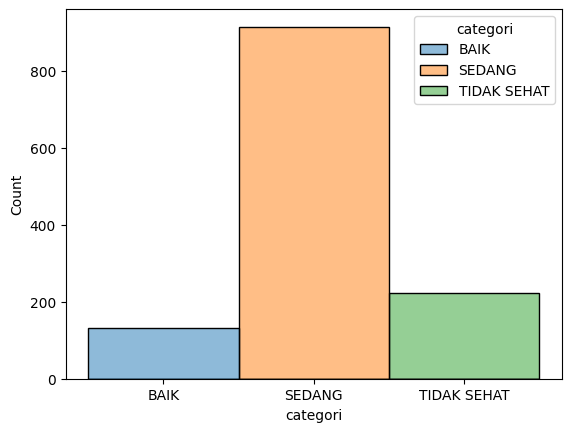

In [128]:
sns.histplot(data = dataset, x = "categori", hue = "categori")

### 3.4. Cek Outliers

<AxesSubplot: xlabel='pm10'>

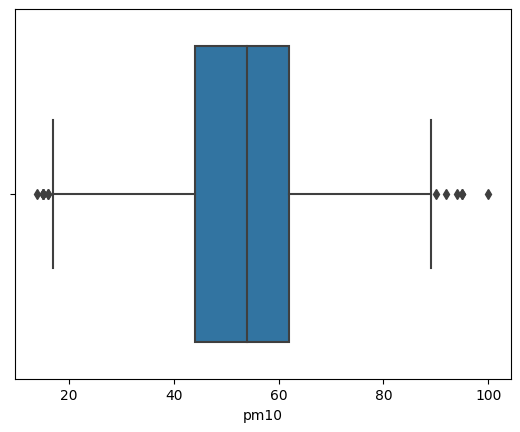

In [121]:
sns.boxplot(data = dataset, x = "pm10")

<AxesSubplot: xlabel='pm25'>

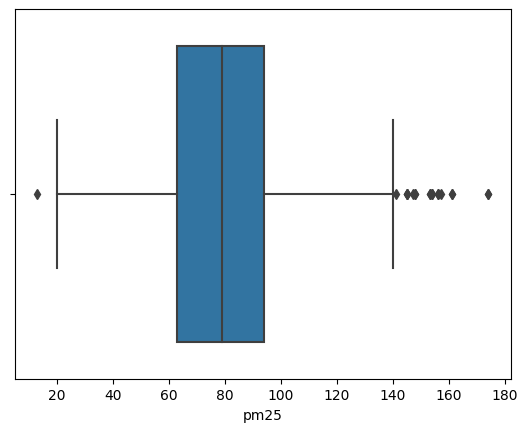

In [122]:
sns.boxplot(data = dataset, x = "pm25")

<AxesSubplot: xlabel='so2'>

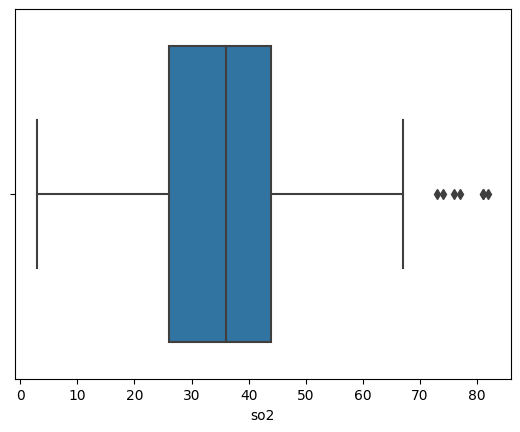

In [129]:
sns.boxplot(data = dataset, x = "so2")

<AxesSubplot: xlabel='co'>

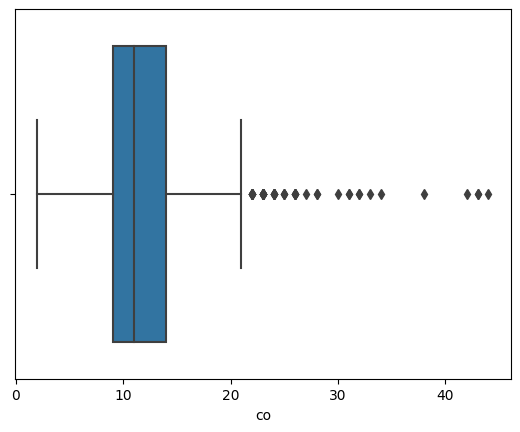

In [134]:
sns.boxplot(data = dataset, x = "co")

<AxesSubplot: xlabel='o3'>

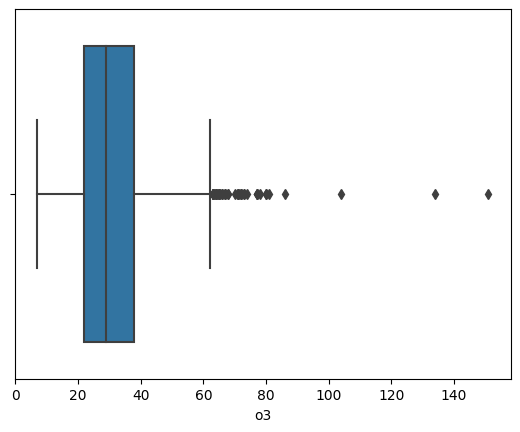

In [130]:
sns.boxplot(data = dataset, x = "o3")

<AxesSubplot: xlabel='no2'>

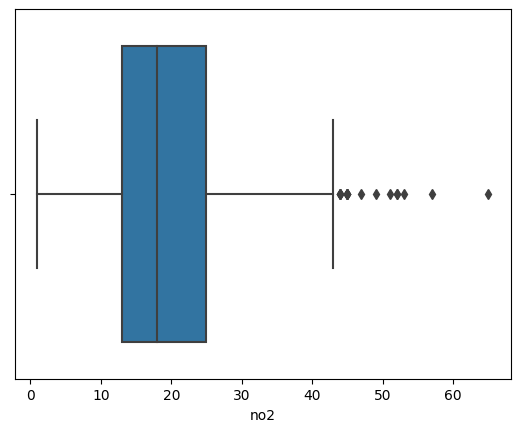

In [133]:
sns.boxplot(data = dataset, x = "no2")

## 4. Kesimpulan

1. Missing value handling
1.1. pm10      : mean kelas
1.2. pm25      : mean kelas
1.3. so2       : mean
1.4. co        : median
1.5. o3        : median
1.6. no2       : median

2. Join kategori sedang dan tidak sehat menjadi tidak baik

3. Balancing label baik dan tidak baik

4. Outlier removal